In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'nearest'

import numpy as np
from matplotlib import pyplot as plt

In [2]:
from skimage import io

image = io.imread("H:/Geography/MASTERARBEIT/Data/ResearchArea/RA1/orthoClipRA1_badRes.jpg")
#image = io.imread('/home/hre070/MA/dji_full.jpg')
#image = io.imread('/home/hre070/MA/Pics_Kalkofen/DJI_0095.JPG')

print(type(image))
print(image.size)



<class 'numpy.ndarray'>
35424000


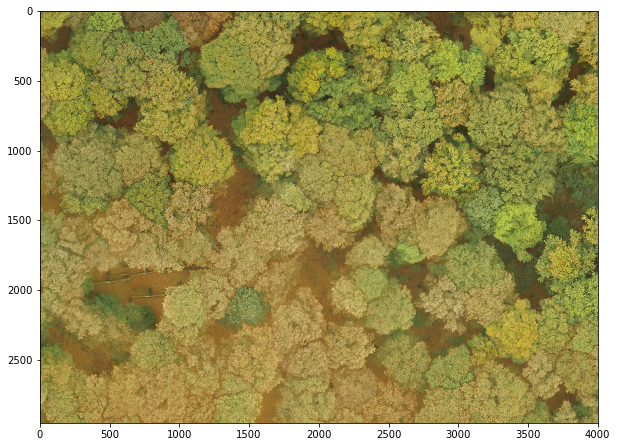

In [3]:
f, ax = plt.subplots(figsize=(10, 10))

ax.imshow(image);

# Superpixel, Words

In [4]:
from skimage.segmentation import quickshift
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

In [6]:
#SLIC
image = img_as_float(image[::2, ::2])
segments_slic = quickshift(image, kernel_size = 8, max_dist = 16, ratio = 0.5)
print('QUICKSHIFT number of segments: {}'.format(len(np.unique(segments_slic))))

QUICKSHIFT number of segments: 288


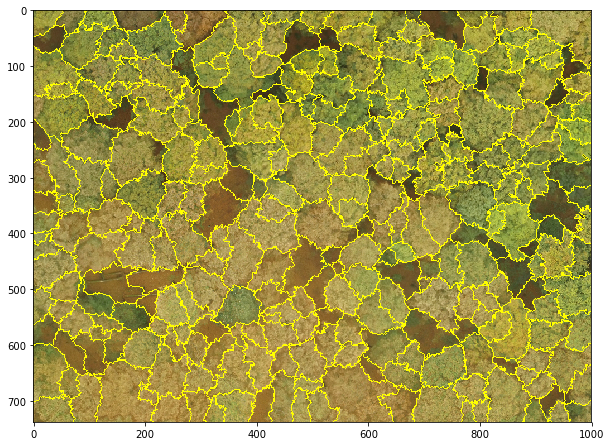

In [7]:
f, ax = plt.subplots(figsize=(10, 10))

ax.imshow(mark_boundaries(image, segments_slic));


In [8]:
#IMPORTS
import sys
sys.path.append("H:/Geography/MASTERARBEIT/src/repoBackup")
sys.path.append("H:/Geography/MASTERARBEIT/src/repoBackup/_LBP")
import lbp
from skimage.transform import rotate
from skimage.color import label2rgb
from skimage.color import rgb2gray

im_gray = rgb2gray(image)

print(im_gray.max(), im_gray.min())

0.842276862745 0.148119607843


In [9]:
# settings for LBP
METHOD = 'nilbp'
radius = 1
n_points = 8 * radius

lbp = lbp.local_binary_pattern(im_gray, None, n_points, radius, METHOD)


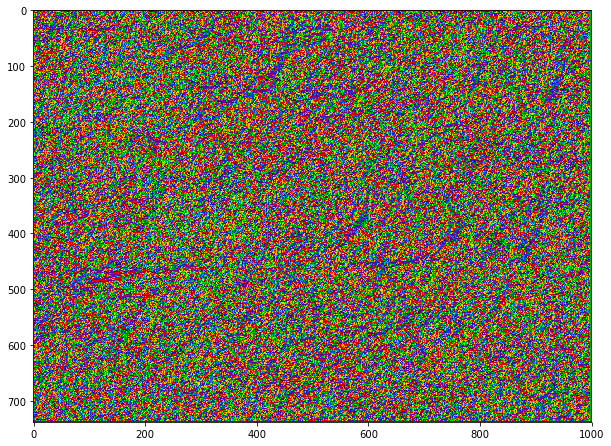

In [10]:
f, ax = plt.subplots(figsize=(10, 10))

#ax.imshow(image)
ax.imshow(lbp, cmap=plt.cm.spectral, alpha=1 )

### Graph:

In [11]:
import networkx as nx

#from bowrag import BOW_RAG, cumu_diff
import bow_rag
import bow_diff

In [12]:
import lbp_bins

In [13]:
BINS = lbp_bins.lbp_bins(n_points, "default")

#BINS

In [14]:
Graph = bow_rag.BOW_RAG(seg_img = segments_slic, tex_img = lbp, color_image = image, tex_bins=BINS, color_bins = 100)

In [15]:
Graph.node[151]

{'color': [<bow_container.hist at 0xffe9fd0>,
 'labels': [151],
 'pixel_count': 5082,
 'tex': <bow_container.hist at 0xfff40b8>}

In [16]:
from bow_diff import config_weighting

wf_both_g = config_weighting(mode="graph")
wf_both_m = config_weighting(mode="merge")

#print(wf_both_m)

In [17]:
Graph.calc_edge_weights(wf_both_g)

In [18]:
Graph.calc_edge_weight_stats()

In [19]:
Graph.edge_weight_stats


{'max': 0.53014210408638873,
 'mean': 0.28178630662875015,
 'median': 0.24199247382617967,
 'min': 0.12413627597753313,
 'stdev': 0.10011446572498249}

(array([  34.,  181.,  202.,   80.,   63.,   51.,   65.,   63.,   46.,   22.]),
 array([ 0.12413628,  0.16473686,  0.20533744,  0.24593802,  0.28653861,
         0.32713919,  0.36773977,  0.40834036,  0.44894094,  0.48954152,
         0.5301421 ]),
 <a list of 10 Patch objects>)

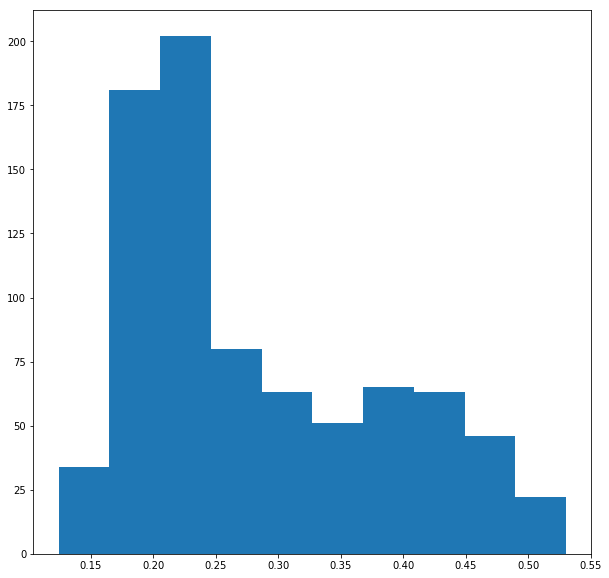

In [20]:
f, ax = plt.subplots(figsize=(10, 10))

#ax.imshow(image)
ax.hist(Graph.get_edge_weight_list())

## Merging:

In [22]:
from skimage.future import graph
from skimage import segmentation, color

In [23]:
th = Graph.get_edge_weight_percentile(70, as_threshhold=True)
print(th)

0.332969580602


In [24]:
import bow_rag

In [25]:
merged = graph.merge_hierarchical(segments_slic, Graph, thresh=th, rag_copy=True,
                                   in_place_merge=True,
                                   merge_func=bow_rag._bow_merge_simple,
                                   weight_func=wf_both_m)



In [26]:
out = color.label2rgb(merged, image, kind='avg')
out = segmentation.mark_boundaries(out, merged, (0, 0, 0))

## Output:

### Original Image

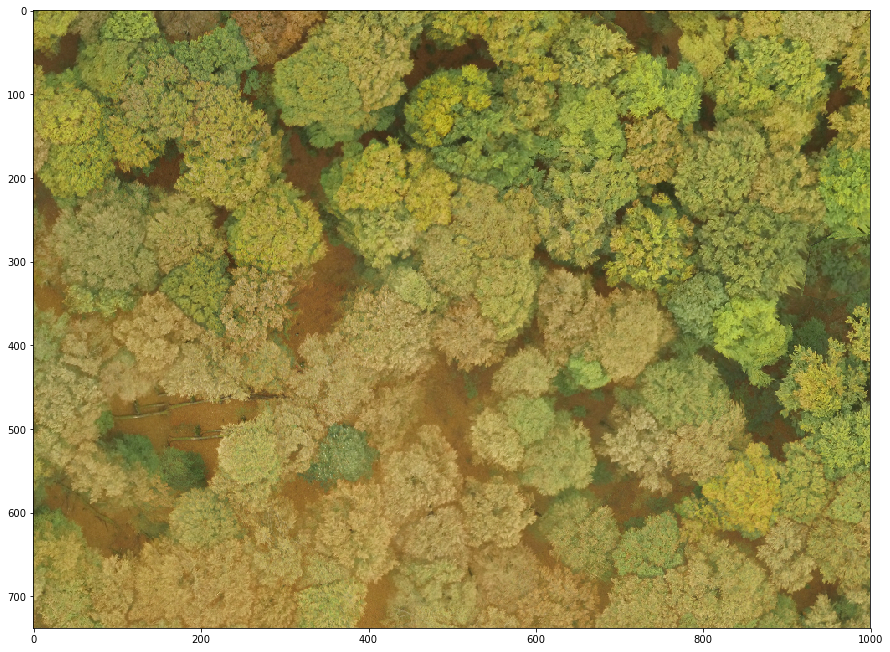

In [27]:
f, ax = plt.subplots(figsize=(15, 15))

ax.imshow(image);

### Segmented Image

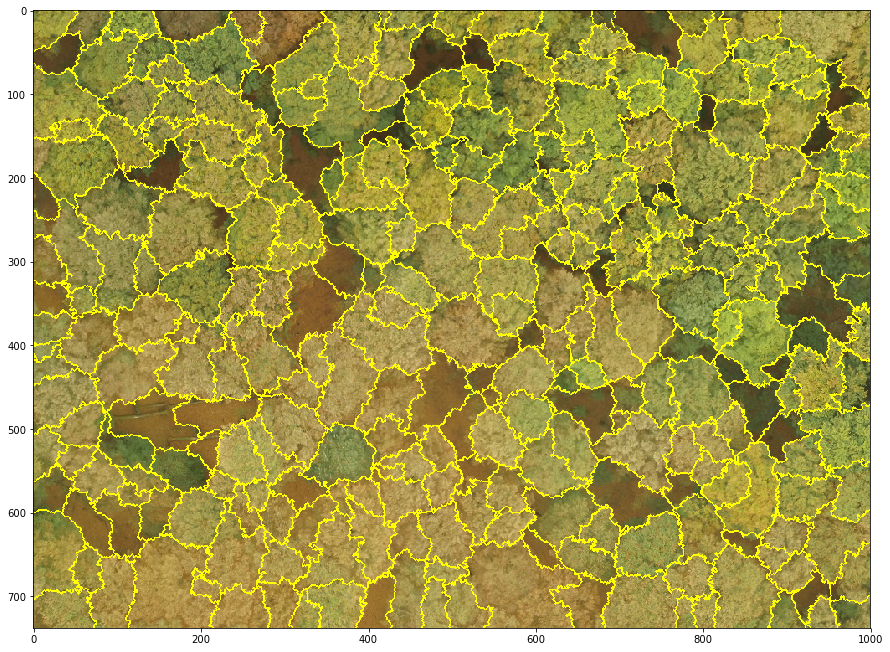

In [28]:
f, ax = plt.subplots(figsize=(15, 15))

ax.imshow(mark_boundaries(image, segments_slic));

### Local Binary Pattern

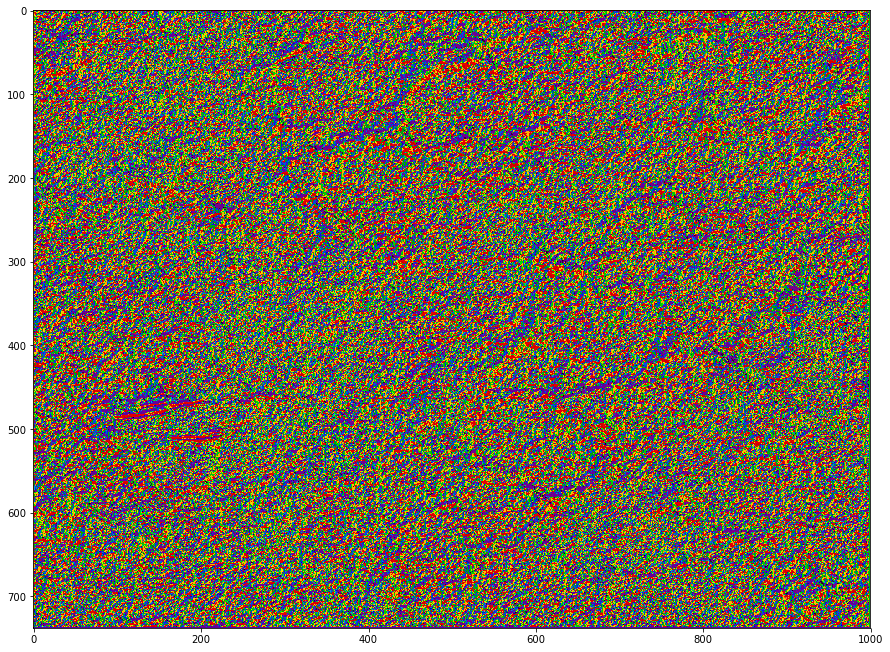

In [29]:
f, ax = plt.subplots(figsize=(15, 15))

ax.imshow(lbp, cmap=plt.cm.spectral, alpha=1 )

### Merged Result

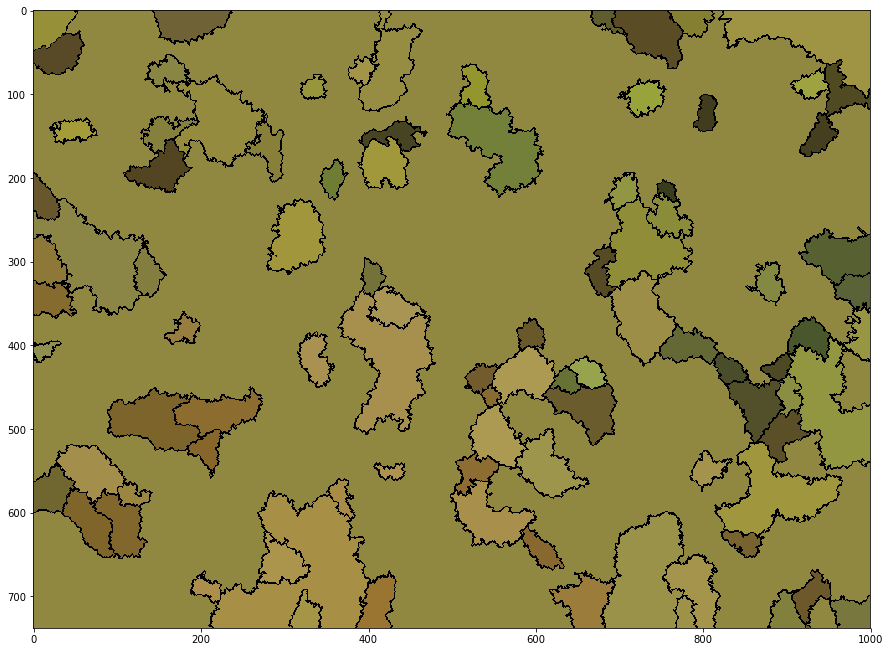

In [30]:
f, ax = plt.subplots(figsize=(15, 15))

ax.imshow(out);